In [26]:
import keras
import numpy as np

In [27]:
from keras.datasets import imdb

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

TypeError: <lambda>() got multiple values for keyword argument 'allow_pickle'

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
decoded_review

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

In [ ]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0728 19:01:49.157857 12428 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 476us/step - loss: 0.4977 - acc: 0.7953 - val_loss: 0.3719 - val_acc: 0.8720
Epoch 2/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.2958 - acc: 0.9045 - val_loss: 0.2990 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.2160 - acc: 0.9285 - val_loss: 0.3087 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1415 - acc: 0.9542 - val_loss: 0.2863 - val_acc: 0.8852
Epoch 6/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1143 - acc: 0.9652 - val_loss: 0.3088 - val_acc: 0.8808
Epoch 7/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.0970 - acc: 0.9711 - val_loss: 0.3147 - 

In [28]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [29]:
import matplotlib.pyplot as plt

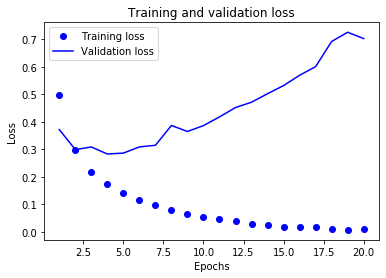

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

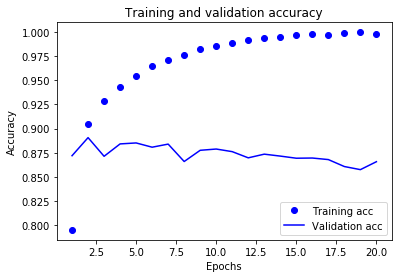

In [31]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=100)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.4583 - acc: 0.8129
Epoch 2/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2630 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2004 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [34]:
results

[0.318775576839447, 0.87496]

In [35]:
model.predict(x_test)


array([[0.24534458],
       [0.9995767 ],
       [0.967549  ],
       ...,
       [0.1647237 ],
       [0.12124625],
       [0.76844   ]], dtype=float32)